**Name:-chandan birendra pandit   
Position :-Machine Learning Intern    
ref:- CTI/A1/C76432**

Task: Predict Restaurant Ratings


*  Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.





# Data Preprocess

Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.

Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Dataset .csv')

In [3]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df['Restaurant ID'].unique()

array([6317637, 6304287, 6300002, ..., 5915807, 5916112, 5927402])

In [9]:
df['Restaurant Name'].unique()

array(['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       ..., 'Huqqa', 'A���k Kahve', "Walter's Coffee Roastery"],
      dtype=object)

In [10]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [11]:
df['Country Code'].value_counts()

,count
Country Code,
1,8652
216,434
215,80
30,60
214,60
189,60
148,40
208,34
14,24


In [12]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [13]:
df['City'].value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Panchkula,1
Mc Millan,1
Mayfield,1


In [14]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 56, Be��ikta��, ��stanbul',
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 64/B, Be��ikta��, ��stanbul',
       'Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul'],
      dtype=object)

In [15]:
df['Address'].value_counts()

,count
Address,
"Dilli Haat, INA, New Delhi",11
"Sector 41, Noida",11
"Greater Kailash (GK) 1, New Delhi",10
"The Imperial, Janpath, New Delhi",9
"Cyber Hub, DLF Cyber City, Gurgaon",8
...,...
"23-24, Defence Colony Market, Defence Colony, New Delhi",1
"28, Main Market, Defence Colony, New Delhi",1
"Daryaganj, New Delhi",1


In [16]:
df['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko��uyolu',
       'Kuru�_e��me', 'Moda'], dtype=object)

In [17]:
df['Locality'].value_counts()

,count
Locality,
Connaught Place,122
Rajouri Garden,99
Shahdara,87
Defence Colony,86
Malviya Nagar,85
...,...
"Lemon Tree Premier, Sector 29",1
"Omaxe Celebration Mall, Sohna Road, Gurgaon",1
"Park Inn, Sector 15, Gurgaon",1


In [18]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [19]:
df['Cuisines'].value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Bengali, Fast Food",1
"North Indian, Rajasthani, Asian",1
"Chinese, Thai, Malaysian, Indonesian",1


In [20]:
df['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [21]:
df['Average Cost for two'].value_counts()

,count
Average Cost for two,
500,900
300,897
400,857
200,687
600,652
...,...
8000,1
2350,1
150000,1


In [22]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [23]:
df['Currency'].value_counts()

,count
Currency,
Indian Rupees(Rs.),8652
Dollar($),482
Pounds(��),80
Brazilian Real(R$),60
Emirati Diram(AED),60
Rand(R),60
NewZealand($),40
Turkish Lira(TL),34
Botswana Pula(P),22


In [24]:
df['Has Table booking'].value_counts()

,count
Has Table booking,
No,8393
Yes,1158


In [25]:
df['Has Online delivery'].value_counts()

,count
Has Online delivery,
No,7100
Yes,2451


In [26]:
df['Is delivering now'].value_counts()

,count
Is delivering now,
No,9517
Yes,34


In [27]:
df['Switch to order menu'].unique()

array(['No'], dtype=object)

In [28]:
df['Switch to order menu'].value_counts()

,count
Switch to order menu,
No,9551


In [29]:
df['Price range'].unique()

array([3, 4, 2, 1])

In [30]:
df['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,498
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


In [31]:
df['Rating color'].value_counts()

,count
Rating color,
Orange,3737
White,2148
Yellow,2100
Green,1079
Dark Green,301
Red,186


In [32]:
df['Rating text'].value_counts()

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [33]:
df['Votes'].value_counts()

,count
Votes,
0,1094
1,483
2,327
3,244
4,207
...,...
615,1
538,1
823,1


**I removed unnecessary columns (features) that do not have any relationship with predicting the Aggregate Rating. To identify these feature, I used scatter plots and box plots to analyze their relationship with the Aggregate Rating. Based on my observations, these feature showed no significant correlation or pattern and were therefore removed to improve the model's focus and performance.**

In [34]:
df = df.drop(['Restaurant Name', 'City', 'Address', 'Locality','Currency','Switch to order menu','Locality Verbose','Longitude','Latitude','Is delivering now','Restaurant ID','Cuisines'], axis=1)

In [35]:
df.head(2)

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,162,1200,Yes,No,3,4.5,Dark Green,Excellent,591


In [36]:
df.isnull().sum()

,0
Country Code,0
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Price range,0
Aggregate rating,0
Rating color,0
Rating text,0
Votes,0


# modeling

**Sepreting target feature**

In [37]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Average Cost for two  9551 non-null   int64  
 2   Has Table booking     9551 non-null   object 
 3   Has Online delivery   9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 671.7+ KB


**I used One-Hot Encoding to encode the categorical or object feature. I did not use Label Encoding because it does not provide better evaluation results based on the evaluation metrics. One-Hot Encoding avoids introducing ordinal relationships between categories, which could otherwise mislead the model.**

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

df = df.drop(categorical_cols, axis=1)

df = pd.concat([df, encoded_df], axis=1)

**Here, I standardized all the columns using Standard Scaling. This ensures that all features are treated equally, avoids bias, and improves the performance of the machine learning models.**

In [40]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[numerical_cols])

scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)

df = df.drop(numerical_cols, axis=1)

df = pd.concat([df, scaled_df], axis=1)


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**1)Linear regression model**

Training Set Metrics:
MSE: 0.0137
MAE: 0.0844
R-squared: 0.9863

Validation Set Metrics:
MSE: 0.0129
MAE: 0.0819
R-squared: 0.9868

Test Set Metrics:
MSE: 0.0142
MAE: 0.0876
R-squared: 0.9858


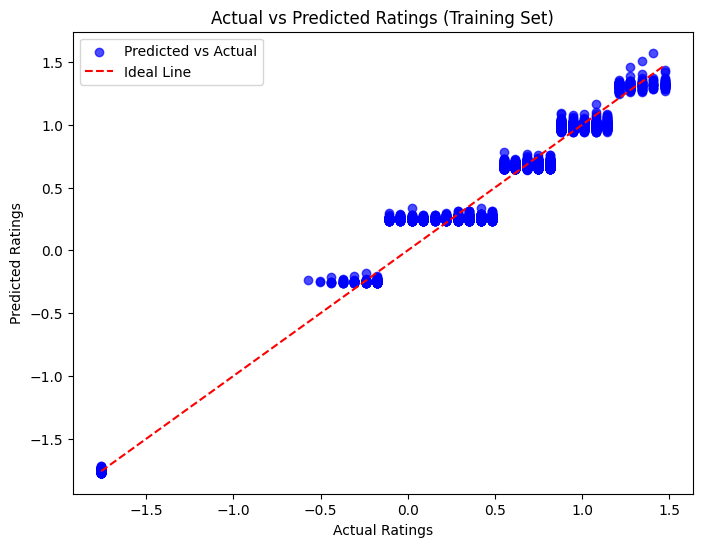

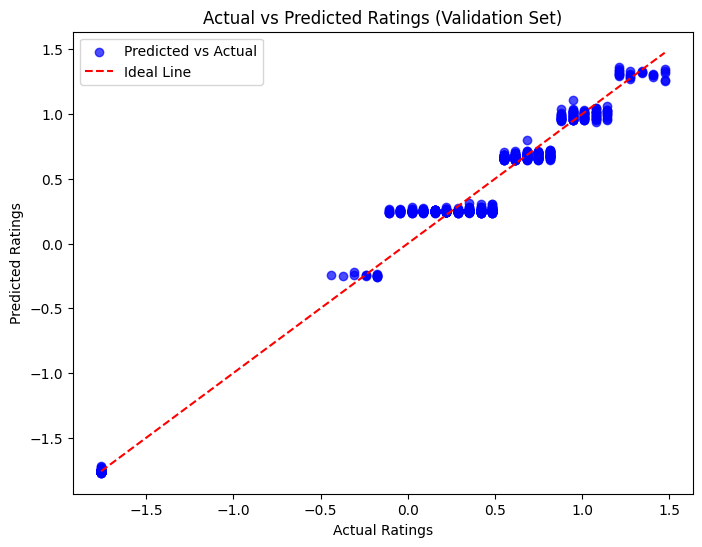

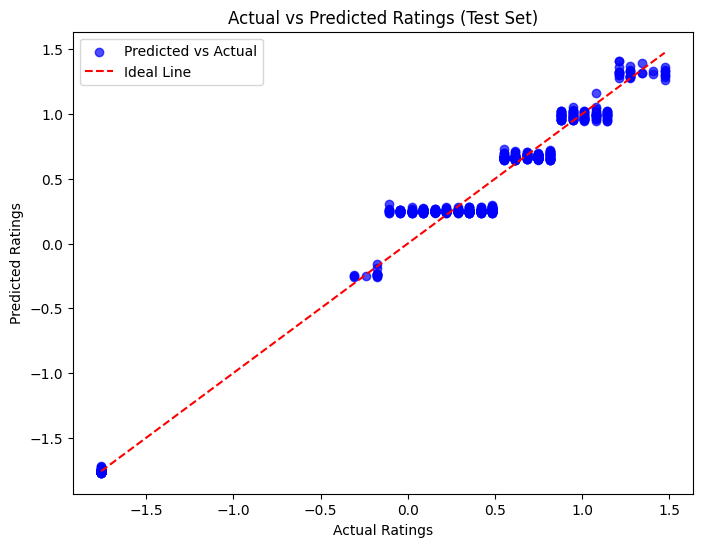

In [42]:
from sklearn.linear_model import LinearRegression

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, r2

train_mse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
val_mse, val_mae, val_r2 = evaluate_model(y_val, y_val_pred)
test_mse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R-squared: {train_r2:.4f}")
print("\nValidation Set Metrics:")
print(f"MSE: {val_mse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R-squared: {val_r2:.4f}")
print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")


def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"Actual vs Predicted Ratings ({dataset_name})")
    plt.legend()
    plt.show()

plot_predictions(y_train, y_train_pred, "Training Set")

plot_predictions(y_val, y_val_pred, "Validation Set")

plot_predictions(y_test, y_test_pred, "Test Set")

**2)KNN regression**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 30, 'metric': 'manhattan'}

Training Set Metrics:
MSE: 0.0124, MAE: 0.0772, R-squared: 0.9876

Validation Set Metrics:
MSE: 0.0118, MAE: 0.0758, R-squared: 0.9880

Test Set Metrics:
MSE: 0.0134, MAE: 0.0813, R-squared: 0.9866


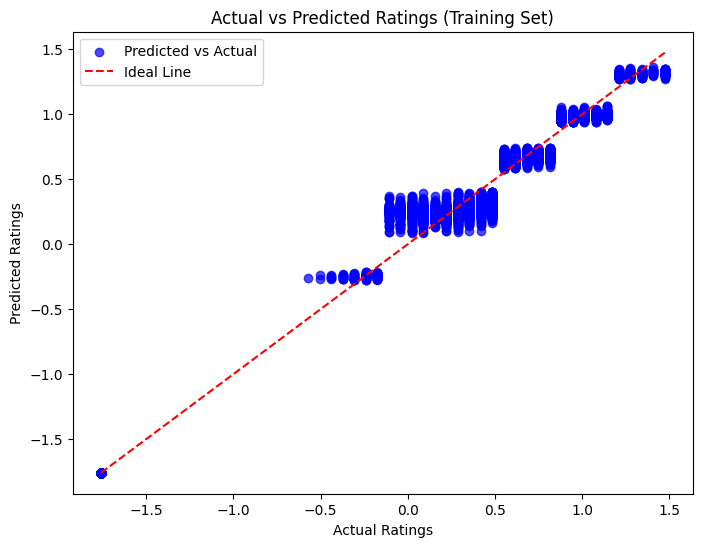

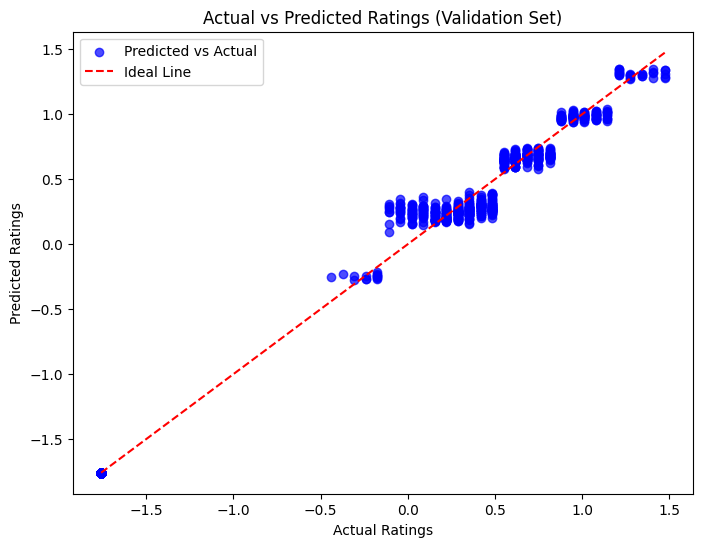

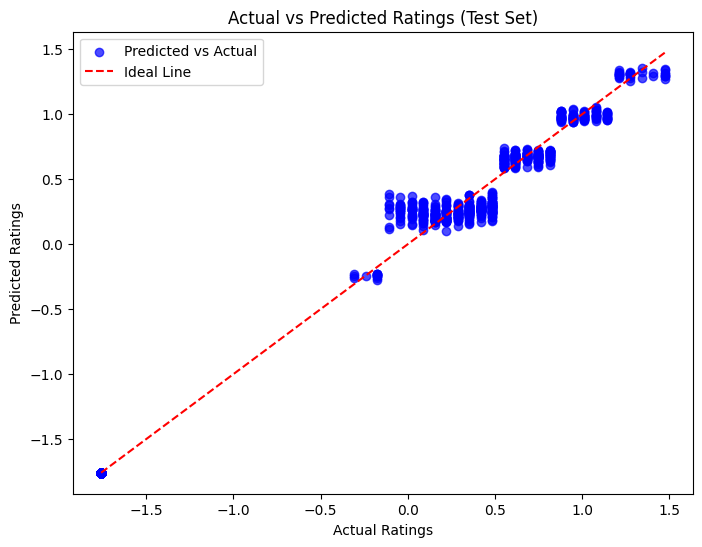

In [43]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

knn = KNeighborsRegressor()

param_distributions = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_knn = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

y_train_pred = best_knn.predict(X_train)
y_val_pred = best_knn.predict(X_val)
y_test_pred = best_knn.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

train_mse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
val_mse, val_mae, val_r2 = evaluate_model(y_val, y_val_pred)
test_mse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R-squared: {train_r2:.4f}")
print("\nValidation Set Metrics:")
print(f"MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, R-squared: {val_r2:.4f}")
print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R-squared: {test_r2:.4f}")

# Plot Actual vs Predicted
def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"Actual vs Predicted Ratings ({dataset_name})")
    plt.legend()
    plt.show()

# Plot for Training, Validation, and Test Sets
plot_predictions(y_train, y_train_pred, "Training Set")
plot_predictions(y_val, y_val_pred, "Validation Set")
plot_predictions(y_test, y_test_pred, "Test Set")


**3)Randomforest regression**

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Training Set Metrics:
MSE: 0.0116, MAE: 0.0747, R-squared: 0.9884

Validation Set Metrics:
MSE: 0.0117, MAE: 0.0761, R-squared: 0.9880

Test Set Metrics:
MSE: 0.0132, MAE: 0.0811, R-squared: 0.9869


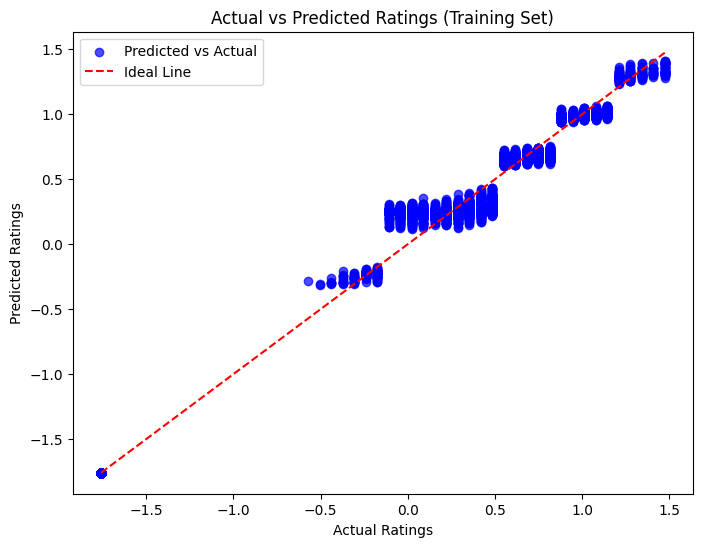

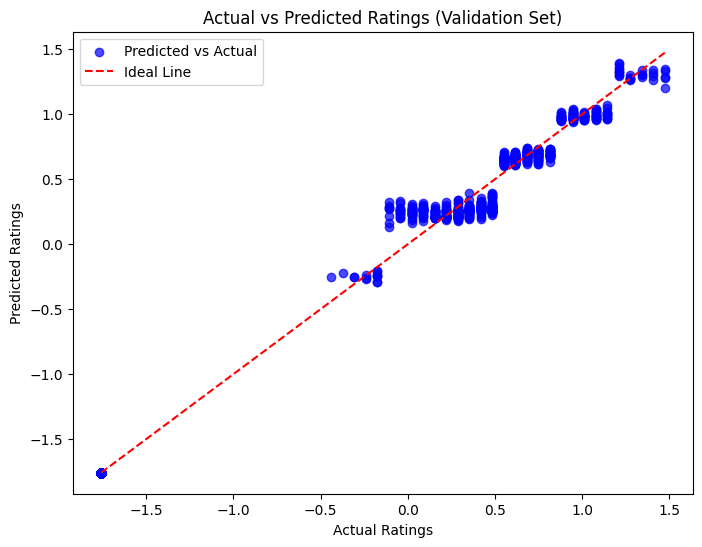

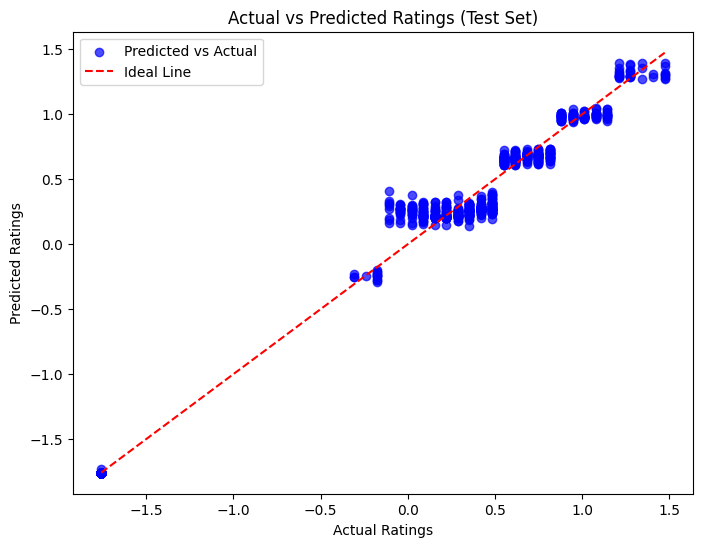

In [44]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

train_mse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
val_mse, val_mae, val_r2 = evaluate_model(y_val, y_val_pred)
test_mse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R-squared: {train_r2:.4f}")
print("\nValidation Set Metrics:")
print(f"MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, R-squared: {val_r2:.4f}")
print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R-squared: {test_r2:.4f}")

def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"Actual vs Predicted Ratings ({dataset_name})")
    plt.legend()
    plt.show()

plot_predictions(y_train, y_train_pred, "Training Set")
plot_predictions(y_val, y_val_pred, "Validation Set")
plot_predictions(y_test, y_test_pred, "Test Set")


**4)Decision tree reression**

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}

Training Set Metrics:
MSE: 0.0130, MAE: 0.0798, R-squared: 0.9870

Validation Set Metrics:
MSE: 0.0122, MAE: 0.0781, R-squared: 0.9875

Test Set Metrics:
MSE: 0.0134, MAE: 0.0827, R-squared: 0.9866


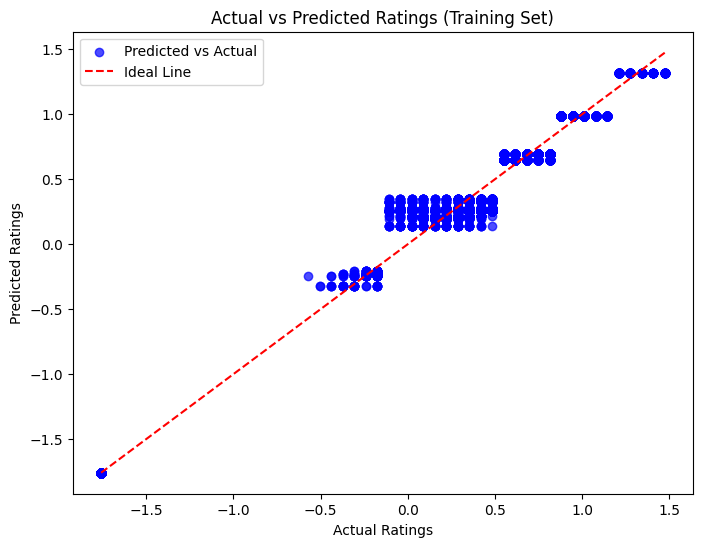

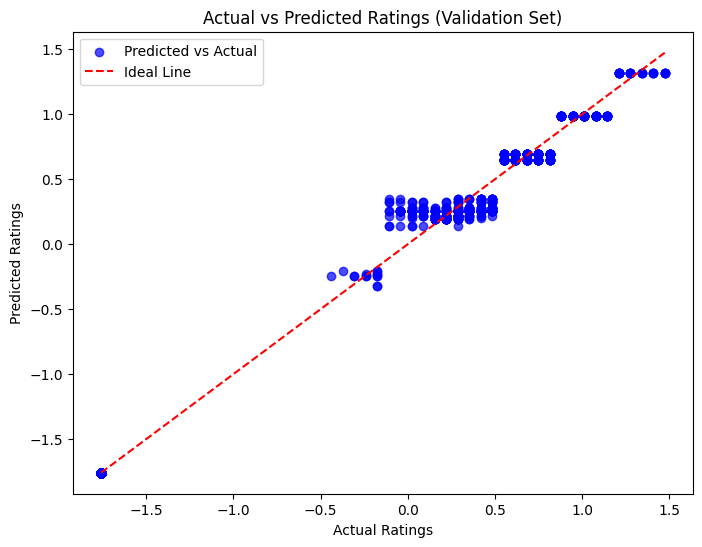

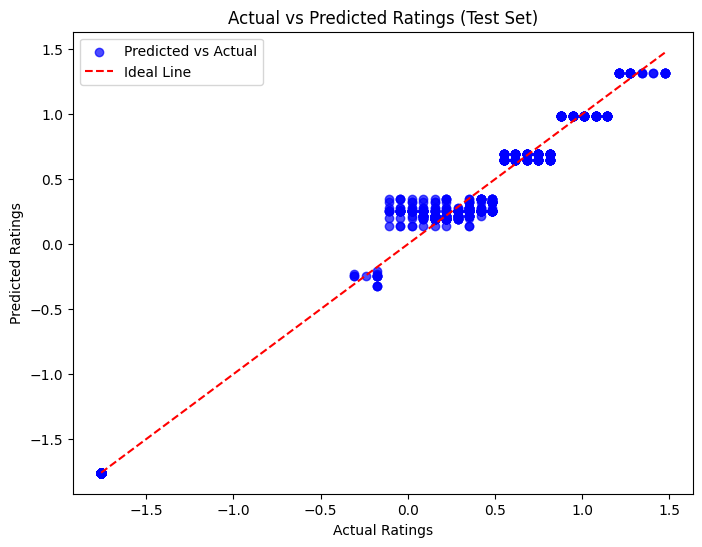

In [45]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dt = DecisionTreeRegressor(random_state=42)

param_distributions = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider for best split
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_dt = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

y_train_pred = best_dt.predict(X_train)
y_val_pred = best_dt.predict(X_val)
y_test_pred = best_dt.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

train_mse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
val_mse, val_mae, val_r2 = evaluate_model(y_val, y_val_pred)
test_mse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

print("\nTraining Set Metrics:")
print(f"MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R-squared: {train_r2:.4f}")
print("\nValidation Set Metrics:")
print(f"MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, R-squared: {val_r2:.4f}")
print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R-squared: {test_r2:.4f}")

def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"Actual vs Predicted Ratings ({dataset_name})")
    plt.legend()
    plt.show()

plot_predictions(y_train, y_train_pred, "Training Set")
plot_predictions(y_val, y_val_pred, "Validation Set")
plot_predictions(y_test, y_test_pred, "Test Set")



**1)Linear regression ***
---
Training Set Metrics:
MSE: 0.0137
MAE: 0.0846
R-squared: 0.9863

Validation Set Metrics:
MSE: 0.0129
MAE: 0.0821
R-squared: 0.9868

Test Set Metrics:
MSE: 0.0142
MAE: 0.0880
R-squared: 0.9858

**2)KNN regression**
---
Training Set Metrics:
MSE: 0.0124, MAE: 0.0772, R-squared: 0.9876

Validation Set Metrics:
MSE: 0.0118, MAE: 0.0758, R-squared: 0.9880

Test Set Metrics:
MSE: 0.0134, MAE: 0.0813, R-squared: 0.9866

**3)Random forest regression**
---
Training Set Metrics:
MSE: 0.0116, MAE: 0.0747, R-squared: 0.9884

Validation Set Metrics:
MSE: 0.0118, MAE: 0.0761, R-squared: 0.9880

Test Set Metrics:
MSE: 0.0132, MAE: 0.0811, R-squared: 0.9869

**4)Decision tree regression**
---
Training Set Metrics:
MSE: 0.0130, MAE: 0.0798, R-squared: 0.9870

Validation Set Metrics:
MSE: 0.0122, MAE: 0.0781, R-squared: 0.9875

Test Set Metrics:
MSE: 0.0134, MAE: 0.0827, R-squared: 0.9866



Based on the evaluation of all four regression models, Random Forest Regression emerges as the best model due to its superior performance metrics, including a **higher R-squared **value and **lower MAE and MSE**. The results are as follows:



Training Set Metrics:    
MSE: 0.0116, MAE: 0.0747, R-squared: 0.9884

Validation Set Metrics:    
MSE: 0.0118, MAE: 0.0761, R-squared: 0.9880

Test Set Metrics:    
MSE: 0.0132, MAE: 0.0811, R-squared: 0.9869

These results demonstrate that the **Random Forest Regression model** provides excellent accuracy and generalization across all datasets.

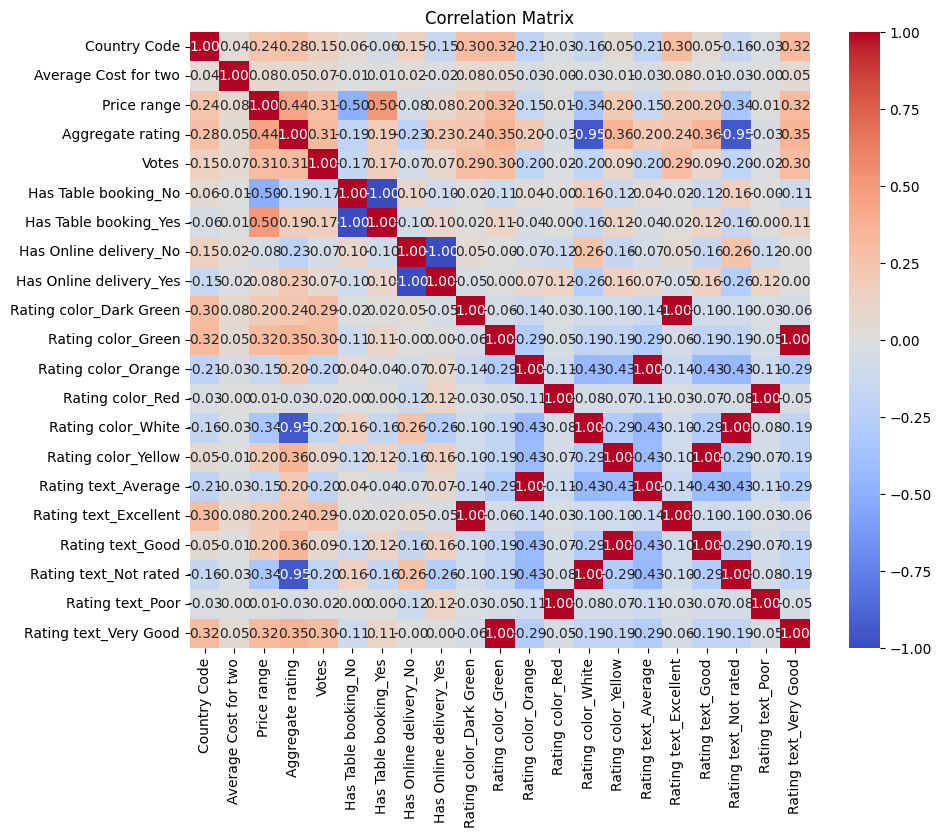

Country Code               0.282189
Average Cost for two       0.051792
Price range                0.437944
Aggregate rating           1.000000
Votes                      0.313691
Has Table booking_No      -0.189998
Has Table booking_Yes      0.189998
Has Online delivery_No    -0.225699
Has Online delivery_Yes    0.225699
Rating color_Dark Green    0.237153
Rating color_Green         0.353452
Rating color_Orange        0.203695
Rating color_Red          -0.034252
Rating color_White        -0.947216
Rating color_Yellow        0.356093
Rating text_Average        0.203695
Rating text_Excellent      0.237153
Rating text_Good           0.356093
Rating text_Not rated     -0.947216
Rating text_Poor          -0.034252
Rating text_Very Good      0.353452
Name: Aggregate rating, dtype: float64


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['Aggregate rating'])


on the basis of correlation matrix we conclude that the **Price range** is most
influential features affecting restaurant ratings. which has the correction **0.437944** with Aggregate rating


**Sumarry**:  
1)During data preprocessing, I removed unnecessary features that did not have any logical relationship with predicting the Aggregate Rating.
After removing these features, I confirmed that there were no missing values in the dataset.

2)Once preprocessing was completed, I assigned the target variable y. I then applied **one-hot encoding** to encode the categorical features and used Standard Scaling to standardize the data. This step ensured that all features were **treated equally**, **avoided bias**, and **improved the performance** of the machine learning models.

3)I used four regression models and split the data into **training (80%), validation (10%)**, and **test (10%)** sets. I then calculated the evaluation metrics, namely **Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²)**.
Based on the evaluation metrics, the best model was determined to be the **Random Forest Regression model**.

4)I also used a **correlation matrix** to identify the most influential features affecting restaurant ratings. I found that **Price Range** was the most significant feature, with a **correlation value of 0.437977**, which was higher than that of other features.